In [1]:
# All purpose 
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics

In [2]:
# download the dataset
import urllib
urllib.request.urlretrieve('https://datalore-samples.s3.eu-west-1.amazonaws.com/datalore_gallery_of_samples/Android_Permission.csv',
                           'ANDROID_PERMISSION.CSV')

KeyboardInterrupt: 

In [3]:
import os
os.listdir('.')   #. represent current working directory

['.ipynb_checkpoints',
 'Adaboost.pdf',
 'ANDROID_PERMISSION.CSV',
 'app aalysis using random forest.ipynb',
 'App_Analysis-Class.ipynb',
 'k.csv',
 'prerequisite.ipynb',
 'Screenshot 2023-10-22 102353.png']

The output of the  Python code list of the names of all the files and directories in the current working directory. The current working directory is the directory that the Python interpreter is currently running in.



In [4]:
# load the dataset
data = pd.read_csv('ANDROID_PERMISSION.CSV')

# print basic information
print("Data shape:", data.shape)
print("Have a look at the data:")
data.head()

Data shape: (583, 184)
Have a look at the data:


,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1.0,0.0,0.0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0


### Ratio malware vs benign apps in the dataset


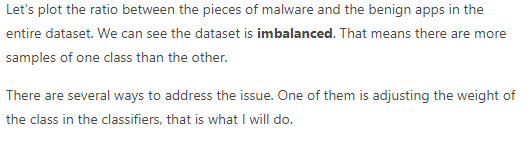

     val
1.0  401
0.0  181


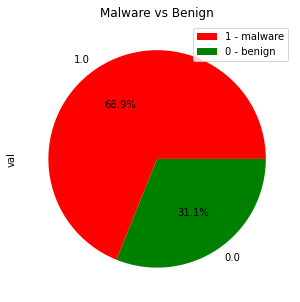

In [5]:
sums = pd.DataFrame({'val':data['Class'].value_counts()})
print(sums)
pl = sums.plot.pie(title='Malware vs Benign',y='val', figsize=(5,5),autopct='%1.1f%%', colors=['r','g'])
a = pl.legend(['1 - malware','0 - benign'])

In [6]:
described_data= data.describe()

In [7]:
described_data.to_csv('k.csv')

In [8]:
data_description = data.describe(include='all').T
print(data_description)

                                                    count unique  \
App                                                   583    581   
Package                                               583    581   
Category                                              583     30   
Description                                           583    583   
Rating                                              583.0    NaN   
...                                                   ...    ...   
Your personal information : set alarm in alarm ...  583.0    NaN   
Your personal information : write Browser's his...  583.0    NaN   
Your personal information : write contact data (D)  582.0    NaN   
Your personal information : write to user defin...  582.0    NaN   
Class                                               582.0    NaN   

                                                                                                  top  \
App                                                                           

In [9]:
pd.set_option('display.max_columns', 184)

In [10]:
data.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card c

What information does the dataset gather for each app?

In [11]:
print('All the columns that dataset contains:')
for column in data.columns:
    print('\t', column) # '\t' is there only for readability ( '\t' = indentation tab)

All the columns that dataset contains:
	 App
	 Package
	 Category
	 Description
	 Rating
	 Number of ratings
	 Price
	 Related apps
	 Dangerous permissions count
	 Safe permissions count
	 Default : Access DRM content. (S)
	 Default : Access Email provider data (S)
	 Default : Access all system downloads (S)
	 Default : Access download manager. (S)
	 Default : Advanced download manager functions. (S)
	 Default : Audio File Access (S)
	 Default : Install DRM content. (S)
	 Default : Modify Google service configuration (S)
	 Default : Modify Google settings (S)
	 Default : Move application resources (S)
	 Default : Read Google settings (S)
	 Default : Send download notifications. (S)
	 Default : Voice Search Shortcuts (S)
	 Default : access SurfaceFlinger (S)
	 Default : access checkin properties (S)
	 Default : access the cache filesystem (S)
	 Default : access to passwords for Google accounts (S)
	 Default : act as an account authenticator (S)
	 Default : bind to a wallpaper (S)
	 Defa

In the code `print(*data["Category"].unique(), sep='\n')`, the asterisk (*) is used for unpacking the elements of the iterable returned by `data["Category"].unique()`.

Here's how it works:

1. `data["Category"].unique()` returns an array or list-like object containing the unique values from the "Category" column of the DataFrame.
2. The asterisk (*) operator is used to unpack the elements of this array and pass them as separate arguments to the `print` function.
3. `sep='\n'` specifies that a newline character should be used as the separator between the values when they are printed. This ensures that each unique category is printed on a separate line.

So, the `print(*data["Category"].unique(), sep='\n')` statement effectively prints each unique category on a separate line. It's a concise way to achieve this output without using a loop.

In [12]:
print(*data["Category"].unique(), sep='\n')


Business
Brain & Puzzle
Cards & Casino
Libraries & Demo
Lifestyle
Personalization
Arcade & Action
Social
Health & Fitness
Entertainment
Casual
Media & Video
Finance
Music & Audio
Books & Reference
Tools
Education
Shopping
Travel & Local
Sports
Racing
Productivity
Communication
Transportation
Comics
Medical
Sports Games
Photography
News & Magazines
Weather


In the code print(*data["Category"].unique(), sep='\n'), the asterisk * is known as the unpacking operator. It is used to unpack the elements of an iterable (such as a list or array) and pass them as separate arguments to a function.

In this specific code, data["Category"].unique() returns an array or list of unique values in the "Category" column of the DataFrame data. The unpacking operator * is then used to unpack these values and pass them as separate arguments to the print() function.

The sep='\n' parameter is used to specify that the values should be printed with a newline character (\n) separating each value, resulting in each unique category being printed on a new line.

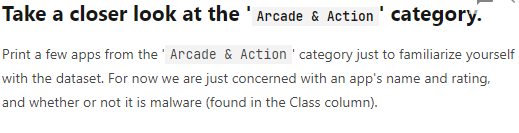

In [13]:
data.loc[data["Category"] == 'Arcade & Action',['App','Class','Rating']].head()


,App,Class,Rating
7,Pumpkins vs. Monsters,0.0,4.7
16,GRave Defense Silver FREE,1.0,4.4
43,Ring Toss,1.0,2.8
64,GEICO Guinea Pig Getaway,0.0,3.1
67,Reaktion,1.0,1.0


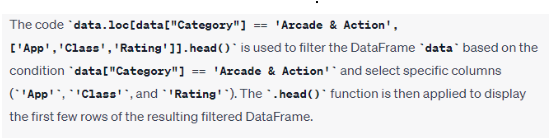

### Exploring the connection between app class and rating

A piece of malware should get a bad rating, shouldn’t it? We can test this intuition by plotting a histogram that displays the ratings on one axis and the number of apps in the class on the other.

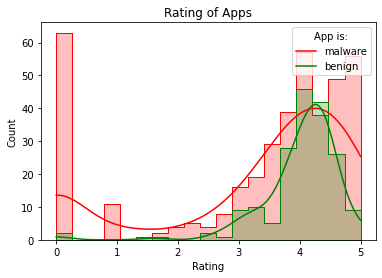

In [14]:
# creating histogram plot
ax = sns.histplot(data=data, x = 'Rating', hue='Class',
             element='step', kde=True, palette=['g', 'r'], legend=False) 

# design - setting title and legend
ax.set_title('Rating of Apps')  
l = ax.legend(title='App is:', loc='upper right', labels=['malware', 'benign'])

###### Analysis 
Unsurprisingly, lots of apps with ratings of 0 are malware. Curiously, a large number of apps with ratings of around 5 are also malware in this dataset, while many benign apps have high ratings, as well.



#### What are the "top" 10 categories with most malware?

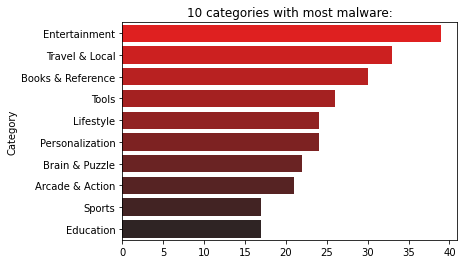

In [15]:
ctr_top = 10
mal_apps = data.groupby('Category')['Class'].apply(lambda x: (x == 1).sum()) # count app in only if it is a malware
mal_apps = mal_apps.sort_values(ascending =False).head(ctr_top)
ax = sns.barplot(x=mal_apps.values, y=mal_apps.index, palette="dark:red_r")
ttl = ax.set_title('{} categories with most malware:'.format(ctr_top))

The code you provided is performing the following steps:

ctr_top = 10: This assigns the value 10 to the variable ctr_top, which represents the number of categories to consider.

mal_apps = data.groupby('Category')['Class'].apply(lambda x: (x == 1).sum()): This groups the DataFrame data by the 'Category' column and applies a lambda function to count the number of occurrences where the 'Class' column is equal to 1 (indicating malware). It creates a new Series mal_apps with the count of malware apps for each category.

mal_apps = mal_apps.sort_values(ascending=False).head(ctr_top): This sorts the mal_apps Series in descending order and selects the top ctr_top (in this case, 10) categories with the highest counts of malware apps.

ax = sns.barplot(x=mal_apps.values, y=mal_apps.index, palette="dark:red_r"): This uses the seaborn library (sns) to create a bar plot. The x parameter is set as the values from the mal_apps Series (the counts of malware apps), and the y parameter is set as the index of mal_apps (the categories). The palette parameter sets the color palette for the plot.

ttl = ax.set_title('{} categories with most malware:'.format(ctr_top)): This sets the title of the plot using the set_title() function of the ax object, which represents the plot axis. The title is formatted to include the value of ctr_top and is followed by the text "categories with most malware:".

By executing this code, you will obtain a bar plot showing the top 10 categories with the highest counts of malware apps, along with a title indicating the number of categories being considered.







In [16]:
data['Category'].value_counts()

Entertainment        49
Books & Reference    36
Personalization      34
Travel & Local       33
Arcade & Action      32
Lifestyle            31
Brain & Puzzle       31
Tools                30
Finance              26
Casual               25
Cards & Casino       24
Education            24
Business             20
Health & Fitness     20
Comics               18
Productivity         17
Sports               17
Communication        17
Media & Video        16
Transportation       13
Libraries & Demo     12
Racing               10
News & Magazines      9
Medical               9
Music & Audio         9
Shopping              5
Sports Games          5
Photography           5
Weather               4
Social                2
Name: Category, dtype: int64

Since we don’t have equal numbers of apps in the different categories, we will try to determine which category has the highest ratio of malware to all the apps in that category. Let's print the top 15 categories.

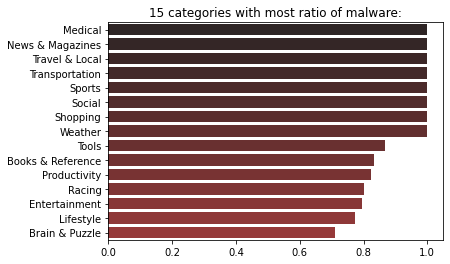

In [17]:
ctr_top = 15
mal_apps = data.groupby('Category')['Class'].apply(lambda x: (x == 1).sum()) # count app in only if it is a malware
all_apps = data['Category'].value_counts()
ratio = mal_apps.divide(all_apps).sort_values(ascending=False).head(ctr_top)
ax = sns.barplot(x=ratio.values, y=ratio.index, palette="dark:brown")
ttl = ax.set_title('{} categories with most ratio of malware:'.format(ctr_top))

Category: Medical
Ratio: 1.0
Value: 9
Division: 9

Category: News & Magazines
Ratio: 1.0
Value: 9
Division: 9

Category: Travel & Local
Ratio: 1.0
Value: 33
Division: 33

Category: Transportation
Ratio: 1.0
Value: 13
Division: 13

Category: Sports
Ratio: 1.0
Value: 17
Division: 17

Category: Social
Ratio: 1.0
Value: 2
Division: 2

Category: Shopping
Ratio: 1.0
Value: 5
Division: 5

Category: Weather
Ratio: 1.0
Value: 4
Division: 4

Category: Tools
Ratio: 0.8666666666666667
Value: 26
Division: 30

Category: Books & Reference
Ratio: 0.8333333333333334
Value: 30
Division: 36

Category: Productivity
Ratio: 0.8235294117647058
Value: 14
Division: 17

Category: Racing
Ratio: 0.8
Value: 8
Division: 10

Category: Entertainment
Ratio: 0.7959183673469388
Value: 39
Division: 49

Category: Lifestyle
Ratio: 0.7741935483870968
Value: 24
Division: 31

Category: Brain & Puzzle
Ratio: 0.7096774193548387
Value: 22
Division: 31



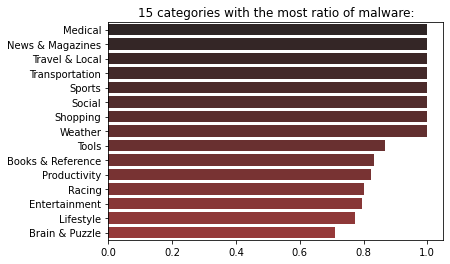

In [18]:
ctr_top = 15

mal_apps = data.groupby('Category')['Class'].apply(lambda x: (x == 1).sum()) # count app only if it is malware
all_apps = data['Category'].value_counts()

ratio = mal_apps.divide(all_apps).sort_values(ascending=False).head(ctr_top)

for category, ratio_value in ratio.items():
    value = mal_apps[category]
    division = all_apps[category]
    print("Category:", category)
    print("Ratio:", ratio_value)
    print("Value:", value)
    print("Division:", division)
    print()

ax = sns.barplot(x=ratio.values, y=ratio.index, palette="dark:brown")
ttl = ax.set_title('{} categories with the most ratio of malware:'.format(ctr_top))


Category: Medical
Numerator (Malware Apps): 9
Denominator (Total Apps): 9
Ratio: 1.0

Category: News & Magazines
Numerator (Malware Apps): 9
Denominator (Total Apps): 9
Ratio: 1.0

Category: Travel & Local
Numerator (Malware Apps): 33
Denominator (Total Apps): 33
Ratio: 1.0

Category: Transportation
Numerator (Malware Apps): 13
Denominator (Total Apps): 13
Ratio: 1.0

Category: Sports
Numerator (Malware Apps): 17
Denominator (Total Apps): 17
Ratio: 1.0

Category: Social
Numerator (Malware Apps): 2
Denominator (Total Apps): 2
Ratio: 1.0

Category: Shopping
Numerator (Malware Apps): 5
Denominator (Total Apps): 5
Ratio: 1.0

Category: Weather
Numerator (Malware Apps): 4
Denominator (Total Apps): 4
Ratio: 1.0

Category: Tools
Numerator (Malware Apps): 26
Denominator (Total Apps): 30
Ratio: 0.8666666666666667

Category: Books & Reference
Numerator (Malware Apps): 30
Denominator (Total Apps): 36
Ratio: 0.8333333333333334

Category: Productivity
Numerator (Malware Apps): 14
Denominator (Total

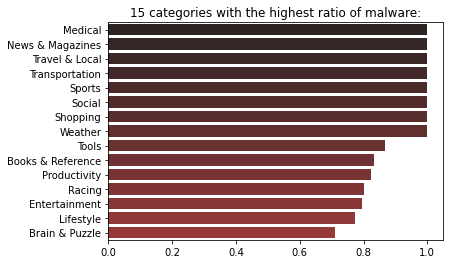

In [19]:
ctr_top = 15

mal_apps = data.groupby('Category')['Class'].apply(lambda x: (x == 1).sum())  # count app only if it is malware
all_apps = data['Category'].value_counts()

ratio = mal_apps.divide(all_apps).sort_values(ascending=False).head(ctr_top)

for category, ratio_value in ratio.items():
    numerator = mal_apps[category]
    denominator = all_apps[category]
    print("Category:", category)
    print("Numerator (Malware Apps):", numerator)
    print("Denominator (Total Apps):", denominator)
    print("Ratio:", ratio_value)
    print()

ax = sns.barplot(x=ratio.values, y=ratio.index, palette="dark:brown")
ttl = ax.set_title('{} categories with the highest ratio of malware:'.format(ctr_top))


In [20]:
type(ratio)

pandas.core.series.Series

In [21]:
ratio

Medical              1.000000
News & Magazines     1.000000
Travel & Local       1.000000
Transportation       1.000000
Sports               1.000000
Social               1.000000
Shopping             1.000000
Weather              1.000000
Tools                0.866667
Books & Reference    0.833333
Productivity         0.823529
Racing               0.800000
Entertainment        0.795918
Lifestyle            0.774194
Brain & Puzzle       0.709677
dtype: float64

In [22]:
print(mal_apps)
print(type(mal_apps))

Category
Arcade & Action      21
Books & Reference    30
Brain & Puzzle       22
Business             10
Cards & Casino        4
Casual               10
Comics                1
Communication         7
Education            17
Entertainment        39
Finance              14
Health & Fitness     11
Libraries & Demo      5
Lifestyle            24
Media & Video        10
Medical               9
Music & Audio         6
News & Magazines      9
Personalization      24
Photography           3
Productivity         14
Racing                8
Shopping              5
Social                2
Sports               17
Sports Games          3
Tools                26
Transportation       13
Travel & Local       33
Weather               4
Name: Class, dtype: int64
<class 'pandas.core.series.Series'>


In [23]:
print(all_apps)
print(type(all_apps))

Entertainment        49
Books & Reference    36
Personalization      34
Travel & Local       33
Arcade & Action      32
Lifestyle            31
Brain & Puzzle       31
Tools                30
Finance              26
Casual               25
Cards & Casino       24
Education            24
Business             20
Health & Fitness     20
Comics               18
Productivity         17
Sports               17
Communication        17
Media & Video        16
Transportation       13
Libraries & Demo     12
Racing               10
News & Magazines      9
Medical               9
Music & Audio         9
Shopping              5
Sports Games          5
Photography           5
Weather               4
Social                2
Name: Category, dtype: int64
<class 'pandas.core.series.Series'>


#### Preprocessing


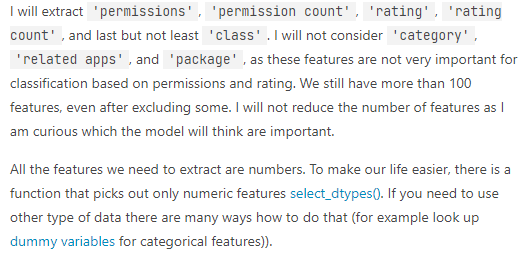

In [24]:
# get only numerical features (as that is all the information about rating, permission and class)
num_values = data.select_dtypes(include='number')

# show missing values
num_values.isna().sum().sort_values(ascending=False)

Dangerous permissions count                                         5
Class                                                               1
Your personal information : write to user defined dictionary (S)    1
Your personal information : write contact data (D)                  1
System tools : set wallpaper (S)                                    0
                                                                   ..
Default : set wallpaper size hints (S)                              0
Default : start IM service (S)                                      0
Default : update component usage statistics (S)                     0
Default : write contact data (S)                                    0
Services that cost you money : directly call phone numbers (D)      0
Length: 179, dtype: int64

In [25]:
num_values

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card c

In [26]:
# fill missing values with mean
num_values = num_values.fillna(num_values.mean())

# checking if there are now no missing values
num_values.isna().sum().sort_values(ascending=False)

Rating                                                      0
Your accounts : Google mail (D)                             0
System tools : read sync statistics (S)                     0
System tools : read/write to resources owned by diag (S)    0
System tools : reorder running applications (D)             0
                                                           ..
Default : set time (S)                                      0
Default : set wallpaper size hints (S)                      0
Default : start IM service (S)                              0
Default : update component usage statistics (S)             0
Class                                                       0
Length: 179, dtype: int64

Next we’ll delete columns which can only have a value of zero, as they do not have an effect on the classifiers and only add dimensionality.

In [27]:
print('Shape before: {}'.format(num_values.shape))


Shape before: (583, 179)


In [28]:
num_values = num_values.loc[:, (num_values != 0).any(axis=0)] 
print(f"Shape after: {num_values.shape}")

Shape after: (583, 98)


This line filters the columns of the num_values DataFrame based on a condition. Let's break it down further:

(num_values != 0) creates a boolean DataFrame where each element is True if the corresponding element in num_values is not equal to zero and False otherwise.

.any(axis=0) checks if there is at least one True value in each column (along the vertical axis). This means that if any element in a column is not equal to zero, the resulting column will contain True; otherwise, it will contain False.

num_values.loc[:, (num_values != 0).any(axis=0)] selects all rows (:) and the columns for which the condition evaluates to True. In other words, it keeps only the columns that have at least one non-zero value.

We do not need 'Rating', 'Price', and 'Dangerous permissions count' to be floats. We can round them to integers.

In [29]:
# checking what value types are in the dataset
print('datatypes in this notebook: ',np.unique(data.dtypes.values))
# getting float column names
float_vals = data.dtypes[data.dtypes.values == 'float64'].index
# rounding float values
num_values[float_vals] = num_values[float_vals].applymap(lambda x: round(x))
print('Rounding ',float_vals.values, '\nWhy? because there is no need for them to be floats.')

print('Now the data is all of integer type:')
num_values.head()

datatypes in this notebook:  [dtype('int64') dtype('float64') dtype('O')]
Rounding  ['Rating' 'Price' 'Dangerous permissions count'
 'Your personal information : write contact data (D)'
 'Your personal information : write to user defined dictionary (S)'
 'Class'] 
Why? because there is no need for them to be floats.
Now the data is all of integer type:


,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Install DRM content. (S),Default : access SurfaceFlinger (S),Default : bind to a wallpaper (S),Default : change screen orientation (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : enable or disable application components (S),Default : force device reboot (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : power device on or off (S),Default : press keys and control buttons (S),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : full Internet access (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card contents (D),System tools : allow Wi-Fi Multicast reception (D),System tools : automatically start at boot (S),System tools : bluetooth administration (D),System tools : change Wi-Fi state (D),System tools : change network connectivity (D),System tools : change your UI settings (D),System tools : delete all application cache data (D),System tools : disable keylock (D),System tools : display system-level alerts (D),System tools : expand/collapse status bar (S),System tools : force stop other applications (S),System tools : kill background processes (S),System tools : make application always run (D),System tools : measure application storage space (S),System tools : modify global system settings (D),System tools : mount and unmount filesystems (D),System tools : prevent device from sleeping (D),System tools : read sync settings (S),System tools : read sync statistics (S),System tools : reorder running applications (D),System tools : retrieve running applications (D),System tools : send sticky broadcast (S),System tools : set preferred applications (S),System tools : set wallpaper (S),System tools : set wallpaper size hints (S),System tools : write Access Point Name settings (D),System tools : write sync settings (D),Your accounts : Google App Engine (D),Your accounts : YouTube (D),Your accounts : YouTube usernames (D),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : edit SMS or MMS (D),Your messages : read Gmail (D),Your messages : read SMS or MMS (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send WAP-PUSH-received broadcast (S),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks 

#### Pearson correlation of features


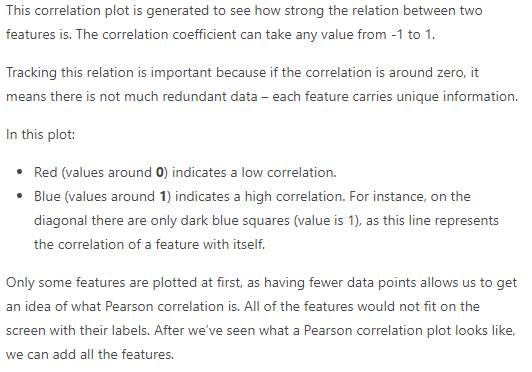

In [30]:
# columns to be plotted
col_names = ['Rating', 'Number of ratings', 'Price',
                       'Dangerous permissions count', 'Safe permissions count', 'Class']
num_cols = num_values[col_names]

Text(0.5, 1.05, 'Pearson Correlation of specified Features')

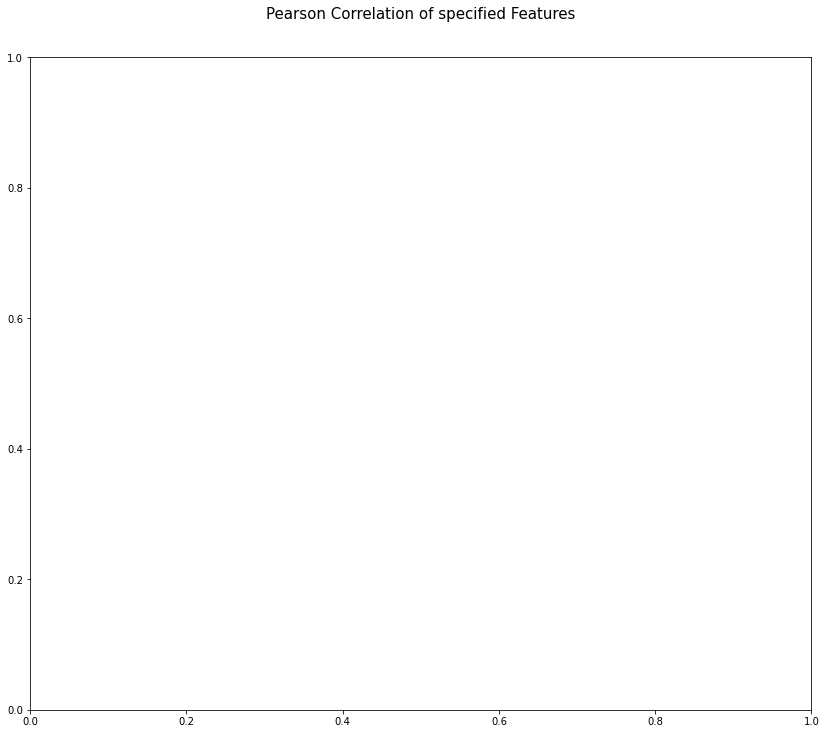

In [31]:
# design
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of specified Features', y=1.05, size=15)

plt.title: This function sets the title of the plot.
'Pearson Correlation of specified Features': This is the text that will be displayed as the title.

y=1.05: This parameter sets the vertical position of the title relative to the plot. A value of 1.05 means the title will be 
positioned slightly above the top of the plot.

size=15: This parameter sets the font size of the title to 15.

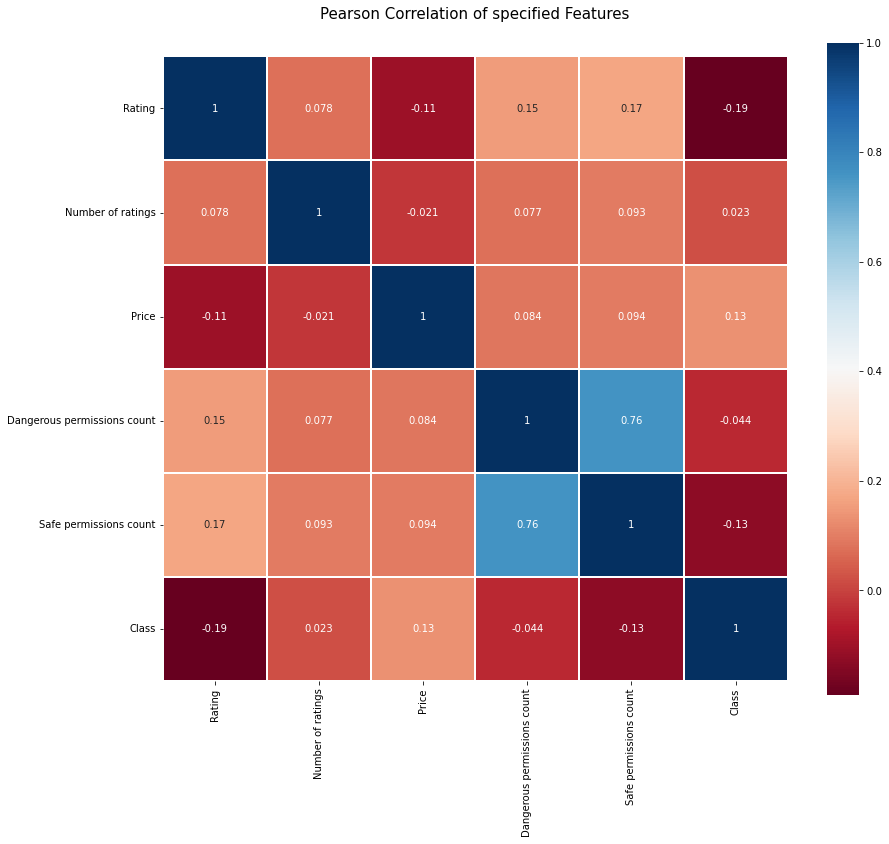

In [32]:
# design
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of specified Features', y=1.05, size=15)

# plotting the pearson correlation
hmp = sns.heatmap(num_cols.corr(), linewidths=0.1, vmax=1.0,
                  square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

hmp = sns.heatmap(...): This line of code creates the heatmap using the sns.heatmap function from the seaborn library. The resulting heatmap is assigned to the variable hmp.

num_cols.corr(): This calculates the Pearson correlation matrix for the specified numerical columns (num_cols). The corr() function computes pairwise correlations between columns in a DataFrame.

linewidths=0.1: This parameter sets the width of the lines between cells in the heatmap to 0.1 units.

vmax=1.0: This parameter sets the maximum value for the color map. A value of 1.0 means that the highest correlation will be represented by the maximum color intensity in the color map.
square=True: This parameter makes the heatmap cells square-shaped.


cmap=plt.cm.RdBu: This parameter sets the color map to be used for the heatmap. plt.cm.RdBu represents the Red-Blue color map.
linecolor='white': This parameter sets the color of the lines separating the cells to white.


annot=True: This parameter adds numerical annotations to each cell in the heatmap, displaying the correlation values.


###### In this correlation plot, the features with the strongest correlation are safe permission count and dangerous permission count. Otherwise the correlation of all chosen features is low.

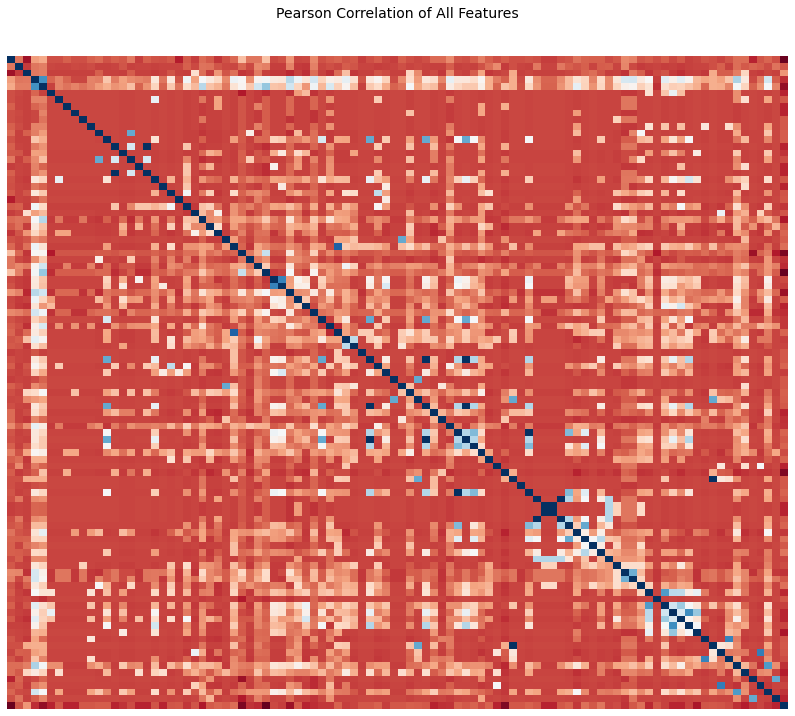

In [33]:
plt.figure(figsize=(14,12))

colormap = plt.cm.RdBu

# plot heatmap set the title
hmp = sns.heatmap(num_values.corr(),cmap=colormap, cbar = False, fmt='') 
hmp.tick_params(axis='both', which='both', length=0)
hmp.xaxis.set_ticklabels([])   
hmp.yaxis.set_ticklabels([])  
t = hmp.set_title('Pearson Correlation of All Features', y=1.05, size=14)

##### Data insight from the Pearson correlation for all features


Not too many of the features are strongly correlated with one another, but we will leave all of them for the models to consider. The models will pick the ones that they think are important.



https://datalore.jetbrains.com/view/notebook/feUEhlTKRkbohY59fq18fN

###### Dataset preparation


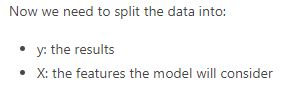

In [34]:
X = num_values.drop(columns = ['Class']).values
y = num_values['Class'].values
X

array([[    3,    77,     0, ...,     0,     1,     0],
       [    4,   199,     0, ...,     0,     0,     0],
       [    4,   243,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,     1, ...,     0,     0,     0],
       [    4, 88890,     0, ...,     0,     0,     1],
       [    4,    38,     0, ...,     0,     0,     0]], dtype=int64)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (408, 97), X_test size: (175, 97)


##### Training Models


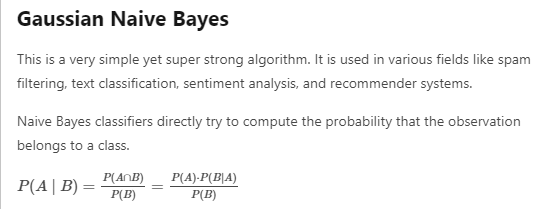

More explanation on Gaussian NB: https://towardsdatascience.com/learning-by-implementing-gaussian-naive-bayes-3f0e3d2c01b2

In [36]:
# initialize the classifier
gnb = GaussianNB()

# train classifier 
gnb.fit(X_train, y_train)
GaussianNB()

GaussianNB()

In [37]:
# predict y values for testing data
gn_pred = gnb.predict(X_test)

#### Evaluate the first model


In [38]:
print('f1 score {}%'.format(round(metrics.f1_score(y_test, gn_pred) * 100, 2)))


f1 score 43.48%


In [39]:
print(metrics.classification_report(y_test, gn_pred))


              precision    recall  f1-score   support

           0       0.36      0.92      0.52        53
           1       0.90      0.29      0.43       122

    accuracy                           0.48       175
   macro avg       0.63      0.61      0.48       175
weighted avg       0.73      0.48      0.46       175



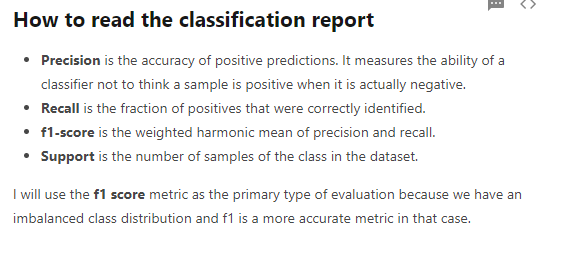

##### Decision Tree 


Simple Code
Here is a starting code snippet.

It is a good practice to start with a tree with smaller depth. Therefore I will initialize max_depth.

Also the random_state parameter is initialized to obtain a deterministic behavior during fitting (the model trains the same each time, so the tree ends up looking the same each time we run the notebook). In other words, the random_state parameter controls the randomness of the estimator.

class 0: Benign 

Class 1: Malware

Since we have an imbalanced dataset, we can assign weights to classes. Here class 0 has weight 2 and class 1 has weight 1 because, as we plotted on page 3, there is twice as much malware as benign apps. This way, when our model meets the underrepresented class, it puts more emphasis on it.

In [40]:
# initialize the classifier
dt1 = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight={0:2,1:1})

# train classifier 
dt1 = dt1.fit(X_train, y_train)

In [41]:
# predict y values for testing and training data
dt_pred_train = dt1.predict(X_train)
dt_pred = dt1.predict(X_test)
print("F1 score: {}%".format(round(metrics.f1_score(y_test, dt_pred) * 100,3)))

F1 score: 70.874%


The tree has:
 - 9 nodes
 - 5 leaves


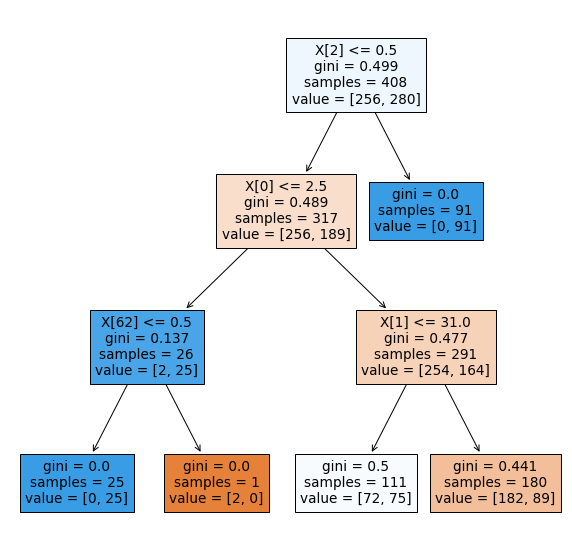

In [42]:
print('The tree has:\n - {} nodes\n - {} leaves'.format(dt1.tree_.node_count, dt1.tree_.n_leaves))

# tree visualisation
plt.figure(figsize=(10,10))
tree = plot_tree(dt1, filled=True)

#### Parameter tuning


But before we can start parameter tuning, the training set needs to be divided into training and validation data. Validation data provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. Without it there would be no easy way to say which values of hyperparameters to choose.



In [43]:
Xtrain, Xval, ytrain, yval = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 


#### Tuning a single hyperparameter


Let's start with the tree’s max_depth hyperparameter. To tune a single hyperparameter, we can use a for loop and just iterate through the various depths.



In [44]:
train_f1 = []
val_f1 = []
depths = range(1,31)
dt = DecisionTreeClassifier(max_depth=1, class_weight={0:2,1:1}, random_state=42)


for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, class_weight={0:2,1:1}, random_state=42)
    dt.fit(Xtrain, ytrain)
    train_f1.append(metrics.f1_score(ytrain, dt.predict(Xtrain)))
    val_f1.append(metrics.f1_score(y_test, dt.predict(X_test)))

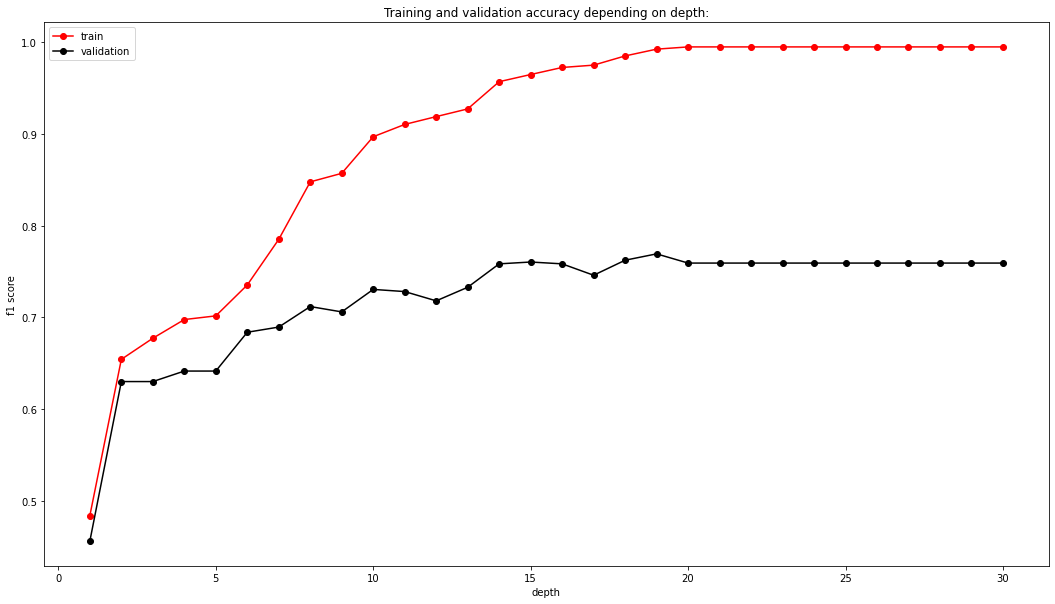

In [45]:
# plot 
title = 'Training and validation accuracy depending on depth:'
plt.figure(figsize=(18, 10))
plt.plot(depths, train_f1, 'or-')
plt.plot(depths, val_f1, 'ok-')
plt.legend(['train', 'validation'])
plt.xlabel('depth')
plt.ylabel('f1 score')
plt.title(title)
plt.show()

In the given code, 'or-' and 'ok-' are format strings that specify the style of the plotted lines.

Let's break down the format strings:

1. 'or-':
   - 'o': Specifies that circular markers should be used at each data point.
   - 'r-': Specifies that a red solid line should be used to connect the data points.

2. 'ok-':
   - 'o': Specifies that circular markers should be used at each data point.
   - 'k-': Specifies that a black solid line should be used to connect the data points.

In summary, 'or-' represents a red line with circular markers, and 'ok-' represents a black line with circular markers. These format strings allow you to customize the style of the plotted lines and markers in Matplotlib.

##### Tuning multiple hyperparameters


In [46]:
from sklearn.model_selection import ParameterGrid

# specify the parameters to tune and their range
param_grid = {
    # max depth choosen from 1 to 20, feel free to change
    'max_depth': range(1,21), 
    # functions that measure the quality of a split
    'criterion': ['entropy', 'gini']
}

# make the parameter combinations
param_comb = ParameterGrid(param_grid)

# for better understanding showing what parameter grid does
# it makes all the combinations
list(param_comb)[:5]
# [{'criterion': 'entropy', 'max_depth': 1},
#  {'criterion': 'entropy', 'max_depth': 2},
#  {'criterion': 'entropy', 'max_depth': 3},
#  {'criterion': 'entropy', 'max_depth': 4},
#  {'criterion': 'entropy', 'max_depth': 5}]
# iterating through all the combinations 
val_f1 = []
train_f1 = []
for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'], class_weight={0:2,1:1}, random_state=42)
    dt.fit(Xtrain, ytrain)
    train_f1.append(metrics.f1_score(ytrain, dt.predict(Xtrain)))
    val_f1.append(metrics.f1_score(yval, dt.predict(Xval)))

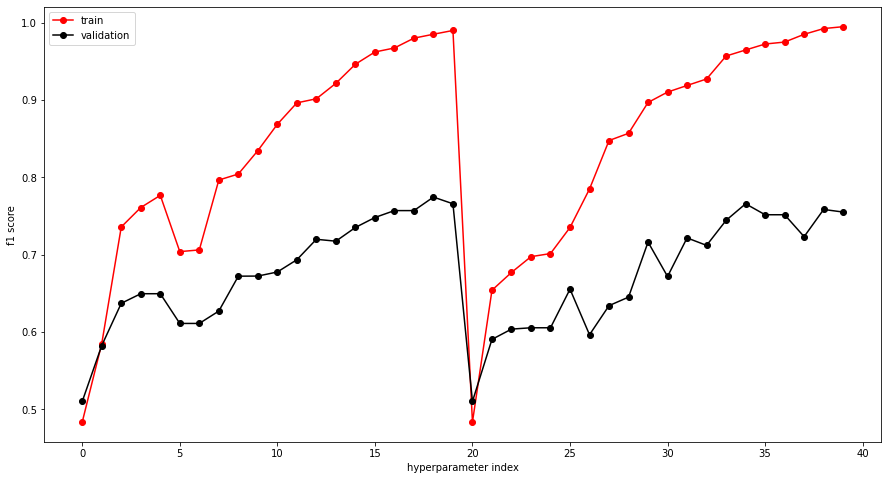

In [47]:
# plot 
plt.figure(figsize=(15,8))
plt.plot(train_f1, 'or-')
plt.plot(val_f1, 'ok-')

# index in the param comb list
plt.xlabel('hyperparameter index')
plt.ylabel('f1 score')
p = plt.legend(['train', 'validation'])

In [48]:
list(param_comb)

[{'criterion': 'entropy', 'max_depth': 1},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 4},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 8},
 {'criterion': 'entropy', 'max_depth': 9},
 {'criterion': 'entropy', 'max_depth': 10},
 {'criterion': 'entropy', 'max_depth': 11},
 {'criterion': 'entropy', 'max_depth': 12},
 {'criterion': 'entropy', 'max_depth': 13},
 {'criterion': 'entropy', 'max_depth': 14},
 {'criterion': 'entropy', 'max_depth': 15},
 {'criterion': 'entropy', 'max_depth': 16},
 {'criterion': 'entropy', 'max_depth': 17},
 {'criterion': 'entropy', 'max_depth': 18},
 {'criterion': 'entropy', 'max_depth': 19},
 {'criterion': 'entropy', 'max_depth': 20},
 {'criterion': 'gini', 'max_depth': 1},
 {'criterion': 'gini', 'max_depth': 2},
 {'criterion': 'gini', 'max_depth': 3},
 {'criter

In [49]:
list(param_comb)[:5]


[{'criterion': 'entropy', 'max_depth': 1},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 4},
 {'criterion': 'entropy', 'max_depth': 5}]

#### Data insight

##### Understanding the hyperparameter index
A hyperparameter index is a value assigned to the specific combination of the hyperparameters. We can see that the first part of the graph shows the Entropy criterion and various depths (increasing with the hyperparameter index). At a hyperparameter index of 20, all depth combinations with Entropy are exhausted. The Gini criterion is displayed instead of Entropy, and then the Entropy criterion is displayed again as we go further down the line and the depth increases.



In [50]:
best_params = param_comb[np.argmax(val_f1)]
print('Best found parameters are: {}'.format(best_params))

Best found parameters are: {'max_depth': 19, 'criterion': 'entropy'}


#### Final model


In [51]:
# initialize the classifier
dt = DecisionTreeClassifier(random_state=42, **best_params, class_weight={0:2,1:1})

# train classifier 
dt = dt.fit(X_train, y_train)

# predict y values for testing and training data
dt_pred_train = dt.predict(X_train)
dt_pred = dt.predict(X_test)

print("F1 score: {}%".format(round(metrics.f1_score(y_test, dt_pred) * 100,3)))

F1 score: 72.646%


###### Random Forest

"The random forest is a classification algorithm consisting of many decision trees.

It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree." Taken from Towards Data Science.

For a decision tree it is very easy to fall into the overfitting trap. This is why ensemble methods such as Random forest are used.

In [52]:
rf = RandomForestClassifier(random_state=42, class_weight={0:2,1:1})

# train classifier
rf = rf.fit(X_train, y_train)

# make predictions on train data
rf_pred_train = rf.predict(X_train)

# make predictions on test data
rf_pred = rf.predict(X_test)

print("F1 score: {}%".format(round(metrics.f1_score(y_test, rf_pred) * 100,3)))

F1 score: 77.519%


We can plot the most influential features for the random forest.


Here's a general approach to find the most influential features in a random forest model:

Train a random forest model: First, you need to train a random forest model on your dataset. This involves specifying the number of trees in the forest and other relevant hyperparameters.

Retrieve feature importances: After training the random forest model, you can access the feature importances. Most implementations of random forests provide a property or method to retrieve these importances.

Sort the feature importances: Sort the feature importances in descending order. This will help you identify the most influential features at the top of the list.

Visualize or analyze the feature importances: You can create a bar chart or plot to visualize the feature importances. This can provide a clear picture of which features have the most impact on the model's predictions.

The provided code snippet is a way to plot the top influencing features in a random forest model. Let's break it down step by step:

1. `n_show = 10`: This variable represents the number of top influencing features you want to plot. In this case, it is set to 10.

2. `features = num_values.drop(columns=['Class'])`: Here, the variable `features` is defined as all the features used for prediction, excluding the 'Class' column.

3. `feat_importances = pd.Series(rf.feature_importances_, index=features.columns)`: This line creates a pandas Series object called `feat_importances` using the feature importances obtained from the random forest model (`rf`). The feature importances are assigned to the corresponding columns in the `features` DataFrame.

4. `feat_importances.nlargest(n_show).plot(kind='barh',color=plt.cm.Pastel1(np.arange(n_show)))`: This code plots a horizontal bar chart using the `plot` method of the `feat_importances` Series object. The `nlargest(n_show)` method selects the top `n_show` features with the largest importances. The `kind='barh'` argument specifies that a horizontal bar chart should be created. The `color=plt.cm.Pastel1(np.arange(n_show))` argument assigns a different color to each bar in the plot.

5. `plt.title("Top {} features that influenced the probability of being malware:".format(n_show))`: This line sets the title of the plot, indicating the number of top features being shown.

6. `plt.show()`: Finally, this command displays the plot.


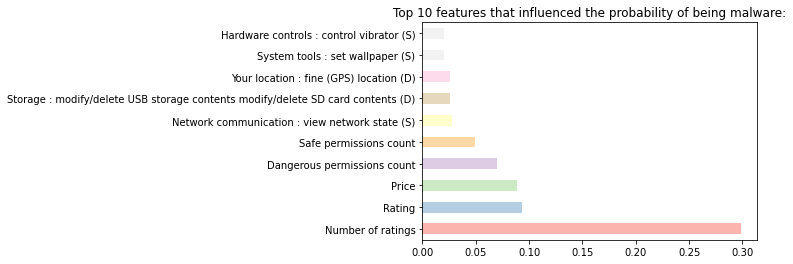

In [53]:
n_show = 10 # how many top influencing features to plot

features = num_values.drop(columns = ['Class']) # all features used for prediction
feat_importances = pd.Series(rf.feature_importances_, index=features.columns)

# getting n_show features and plotting them
feat_importances.nlargest(n_show).plot(kind='barh',color=plt.cm.Pastel1(np.arange(n_show)))
plt.title("Top {} features that influenced the probability of being malware:".format(n_show))
plt.show()

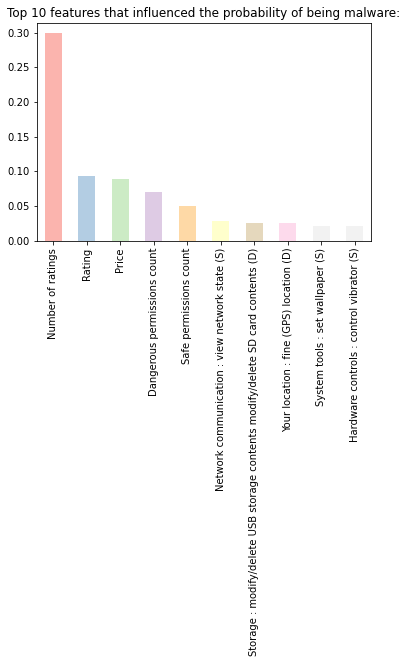

In [54]:
n_show = 10 # how many top influencing features to plot

features = num_values.drop(columns = ['Class']) # all features used for prediction
feat_importances = pd.Series(rf.feature_importances_, index=features.columns)

# getting n_show features and plotting them
feat_importances.nlargest(n_show).plot(kind='bar',color=plt.cm.Pastel1(np.arange(n_show)))
plt.title("Top {} features that influenced the probability of being malware:".format(n_show))
plt.show()

#### AdaBoost

Like the random forest model, AdaBoost, or Adaptive boost, is an ensemble method. It combines many weak decision trees and turns them into one strong model. AdaBoost can be used on both classification and regression problems.



## How it differs from the random forest
AdaBoost makes a collection of stumps, rather than full trees. A stump is a tree with a root and two leaves.
Each stump tries to reduce an error that the previous stump made. Therefore the order of the stumps is important.
Stumps are unequally weighted in the final prediction.


In [55]:
# initialize classifier
ab = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100,
                                                               oob_score=True,
                                                               max_depth=1,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                              class_weight={0:2,1:1}
                                                              ))

# train classifier
ab.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight={0: 2,
                                                                       1: 1},
                                                         max_depth=1,
                                                         oob_score=True))

In [56]:
# predict for testing data
ab_pred = ab.predict(X_test)
print("F1 score: {}%".format(round(metrics.f1_score(y_test, ab_pred) * 100,3)))

F1 score: 73.488%


#### Data Insight

We can see that Naive Bayes performed the worst.

Why does the random forest outperforms the tuned decision tree?
To recapitulate, random forest leverages the power of multiple decision trees. It does not rely on the feature importance given by a single decision tree. That is why it is so effective and outperformed our tuned decision tree.

AdaBoost
In this classification task, AdaBoost also did well.

### Classification reports
Random forest yielded the best results.

In [57]:
print(metrics.classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.44      0.32      0.37        53
           1       0.74      0.82      0.78       122

    accuracy                           0.67       175
   macro avg       0.59      0.57      0.57       175
weighted avg       0.64      0.67      0.65       175

